## ignoring warnings

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

## Loading data

In [3]:
import torch
data = torch.load('../dataset/dataset/part_one_dataset/train_data/1_train_data.tar.pth')

## Analyzing data

In [4]:
print(data.keys())

dict_keys(['data', 'targets'])


In [5]:
print(data['data'].shape)
print(data['targets'].shape)

(2500, 32, 32, 3)
(2500,)


In [6]:
print(type(data['data']))

<class 'numpy.ndarray'>


In [7]:
print(data['data'][0].shape)

(32, 32, 3)


In [8]:
print(type(data))

<class 'dict'>


## Converting dict to df

In [9]:
print(type(data['targets']))
print(type(data['data']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
print(data['targets'].shape)
print(data['data'].shape)

(2500,)
(2500, 32, 32, 3)


In [11]:
df = pd.DataFrame(data['targets'])
df.columns = ['targets']
print(df.head())

   targets
0        6
1        9
2        9
3        4
4        1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='targets', ylabel='count'>

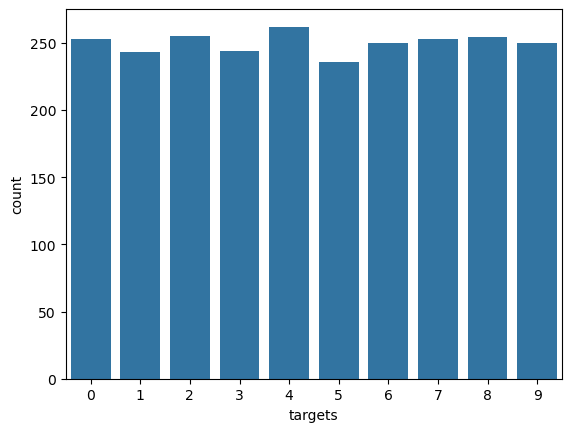

In [13]:
sns.countplot(x='targets', data=df)


## Extracting features

In [14]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model

# Example data (replace this with your actual data)
X_train = data['data']  # 2500 images, 32x32x3 shape
y_train = data['targets']   # 10 classes (0-9)

# Create a CNN model for feature extraction
input_layer = layers.Input(shape=(32, 32, 3))

# Convolutional Layer 1
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)

# Convolutional Layer 2
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten the output of the last convolutional layer
x = layers.Flatten()(x)

# Fully connected layers (optional for classification)
x = layers.Dense(128, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

# Build the model
cnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform a dummy pass to initialize the model and its weights
cnn_model.predict(np.random.rand(1, 32, 32, 3))  # A dummy pass to initialize the model

# Now, remove the classification layers and only output the features
# Access the last convolutional layer (before flattening) for feature extraction
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[2].output)  # The second conv layer is at index 2

# Extract features from the CNN model (this will be a 2D array of shape (2500, num_features))
features = feature_extractor.predict(X_train)

print(f"Extracted Features Shape: {features.shape}")  # Should print the shape like (2500, num_features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Extracted Features Shape: (2500, 15, 15, 32)


In [15]:
features_flat = features.reshape(features.shape[0], -1)

# Now, 'features_flat' contains the extracted features
print(features_flat.shape) 

(2500, 7200)


## Dimensionality Reduction

In [16]:
from sklearn.decomposition import PCA

# Assume features_flat is your flattened feature array from the pretrained model
# For example, features_flat.shape = (2500, 25088) for VGG16

# Initialize PCA to reduce the dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
features_reduced = pca.fit_transform(features_flat)

print(features_reduced.shape)  

(2500, 197)


In [17]:
print(type(features_reduced))

<class 'numpy.ndarray'>


In [18]:
print(features_reduced[0])

[-9.42133484e+02  3.19530884e+02  3.99988098e+02 -6.81166077e+01
 -1.71152374e+02  2.86264069e+02 -4.77543640e+02 -9.45908585e+01
  3.64191162e+02 -2.67274837e+01 -9.31042938e+01 -1.70824871e+01
 -1.42273315e+02  2.69070644e+01 -1.34924774e+02 -1.67679962e+02
 -8.23179855e+01  7.41216354e+01  1.09428474e+02 -1.01316330e+02
  5.59224548e+01 -5.76007996e+01 -8.19527969e+01 -1.66649647e+01
 -2.05370850e+02 -3.58563194e+01  6.30970535e+01 -5.09900703e+01
  1.42064590e+02 -5.57907486e+01 -1.23121691e+01 -2.05236649e+02
  6.86222076e+01 -7.81656494e+01 -2.18883681e+00 -1.33190399e+02
  2.92115364e+01 -2.77154102e+01 -8.24711075e+01  6.50013733e+01
 -2.97441082e+01 -1.17397369e+02 -6.14591675e+01  1.24727039e+01
  2.63783741e+01 -4.41545792e+01 -7.97813644e+01 -1.34584686e+02
  8.28263855e+01  1.25009813e+01  3.81719551e+01 -6.55501862e+01
  4.76214561e+01 -1.96647930e+01  8.48361740e+01 -8.61513710e+00
  2.76693511e+00 -6.77118530e+01 -2.58052635e+01 -1.84278107e+01
 -2.33583713e+00  4.85496

## Converting to Gaussian

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the reduced feature set (features_reduced)
features_standardized = scaler.fit_transform(features_reduced)

# Now, 'features_standardized' is standardized and ready for use

print(features_standardized.shape)

(2500, 197)


In [20]:
df_data = pd.DataFrame(features_standardized)

In [21]:

print(df.head())

   targets
0        6
1        9
2        9
3        4
4        1


In [22]:
df_concat = pd.concat([df_data,df],axis = 1)
print(df_concat.head())

          0         1         2         3         4         5         6  \
0 -1.042991  0.571573  0.884869 -0.204003 -0.600631  1.037739 -1.789148   
1  0.501430  0.183479  1.719059  1.187633 -0.462665  0.581864 -0.280496   
2  0.924249 -2.615865 -0.451526  1.114430  1.116076  0.125959 -0.084454   
3 -1.520514 -0.045934  0.457797 -0.061853 -0.485933  0.575733 -0.599495   
4 -0.204705 -0.624791  0.716081  0.766009 -1.634096  2.184205  1.818732   

          7         8         9  ...       188       189       190       191  \
0 -0.371739  1.502126 -0.130588  ...  0.791479  1.218074 -2.266400  1.371203   
1 -0.204404  1.000061  0.186951  ... -1.093575 -0.155285  0.614136  0.976716   
2  0.552628  0.167483 -0.792693  ...  0.764892  1.206972 -0.018604 -0.022671   
3 -0.218466  0.712605 -0.019918  ... -0.276307 -0.962911 -0.752052 -0.511022   
4 -1.114561  0.697149  2.362626  ... -0.036335  1.262264  1.050442  2.919211   

        192       193       194       195       196  targets  
0 -0.

In [23]:
print((features_standardized))

[[-1.0429906   0.5715735   0.8848693  ...  1.885254    0.7995722
  -0.4568425 ]
 [ 0.50143033  0.18347883  1.7190593  ...  1.335926    2.2320187
  -3.7792451 ]
 [ 0.92424923 -2.6158655  -0.4515261  ... -0.21890102  0.55437917
  -0.10729046]
 ...
 [ 0.03987663 -1.3399388  -0.25572163 ... -1.82035     0.7325198
  -1.0288762 ]
 [ 1.0451206  -1.5756922   0.08399402 ... -0.39443403 -1.1628679
   1.1637527 ]
 [ 0.22680488  0.40716994  1.8048841  ... -0.382586    0.32030252
   0.02561782]]


In [24]:
print(type(data['targets']))

<class 'numpy.ndarray'>


## DO the lwp

In [25]:


y = data['targets']
X = features_standardized



In [26]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape
from sklearn.metrics import accuracy_score

# Example: X is your input data (already transformed, standardized, and linearized)
# y is your labels (integers from 0 to 9 for 10 classes)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to fit LSTM input requirements (LSTM expects 3D input)
# Here, we reshape X_train and X_test from shape (num_samples, num_features) to (num_samples, timesteps, features)
# We can consider each feature as a timestep, with 1 feature per timestep (timesteps=1).

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (num_samples, timesteps=1, num_features)
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))      # (num_samples, timesteps=1, num_features)

# Build the neural network model with an LSTM layer
model = Sequential()

# Input layer (since X has already been transformed, we start with the feature size directly)
model.add(LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu', return_sequences=False))  # LSTM layer

# Dense layers
model.add(Dense(128, activation='relu'))  # Second hidden layer
model.add(Dense(64, activation='softmax'))  # Output layer with 10 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the predicted class (the class with the highest probability)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0924 - loss: 3.6638 - val_accuracy: 0.2140 - val_loss: 2.2649
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3624 - loss: 2.0406 - val_accuracy: 0.3220 - val_loss: 1.9715
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6102 - loss: 1.4479 - val_accuracy: 0.3940 - val_loss: 1.7114
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7730 - loss: 0.8662 - val_accuracy: 0.4400 - val_loss: 1.6686
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8788 - loss: 0.5272 - val_accuracy: 0.4340 - val_loss: 1.7637
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9451 - loss: 0.3018 - val_accuracy: 0.4380 - val_loss: 1.8792
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9720 - loss: 0.1890 - val_accuracy: 0.4200 - val_loss: 2.0101
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: 0.1013 - val_accuracy: 0.4240 - 

### Analyzing Images

In [27]:
from PIL import Image
import os
import tensorflow as tf

In [28]:
for i in range(2500):
    img = Image.fromarray(data['data'][i])
    target_dir = f"./{data['targets'][i]}"
    os.makedirs(target_dir, exist_ok=True)
    img.save(f"{target_dir}/img{i}.png")

### PCA

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming `images` is a NumPy array or TensorFlow tensor with shape (num_samples, 32, 32, 3)
images = data['data']  # Update with your actual dataset
labels = data['targets']  # Ensure you have corresponding labels for supervised learning

# Normalize the image data
images = images / 255.0  # Normalize pixel values to [0, 1]

# Convert labels to one-hot encoding if not already
labels = tf.keras.utils.to_categorical(labels, num_classes=10)  # Adjust `num_classes` as per your dataset

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Enhanced CNN Model for feature extraction
model = tf.keras.Sequential([
    # First Convolutional Block
    tf.keras.layers.Conv2D(
        filters=4,  # Number of filters for learning low-level features
        kernel_size=(2, 2),  # Filter size
        strides=(1, 1),  # No down-sampling yet
        padding='same',  # Keeps output size same
        activation='relu',  # ReLU activation
        input_shape=(32, 32, 3)  # Input shape for RGB images
    ),
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),  # Reduce height and width by 2
        strides=(2, 2),
        padding='valid'  # Reduce size
    ),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(
        filters=8,  # Double the filters for learning mid-level features
        kernel_size=(2, 2),
        strides=(1, 1),
        padding='same',
        activation='relu'
    ),
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        padding='valid'
    ),

    # Flatten the features to use later or pass through Dense layers
    tf.keras.layers.Flatten(),
    
    # Add Dense layers for classification
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjust `10` to your number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10000,  # Train for 10000 epochs
    batch_size=64,  # Adjust batch size as needed
    verbose=1  # Use 1 for progress bar, 2 for one line per epoch
)

# Extract features using the model
# Use intermediate layers or predictions for features
features = model.predict(images)

# Print feature shape
print(f"Extracted features shape: {features.shape}")  # Example: (num_samples, num_features)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 4)           │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 8)           │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,142 (262.27 KB)

 Trainable params: 67,142 (262.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1003 - loss: 2.3114 - val_accuracy: 0.2040 - val_loss: 2.2510
Epoch 2/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2071 - loss: 2.2199 - val_accuracy: 0.2120 - val_loss: 2.1395
Epoch 3/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2726 - loss: 2.0882 - val_accuracy: 0.2820 - val_loss: 1.9954
Epoch 4/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3215 - loss: 1.9279 - val_accuracy: 0.2920 - val_loss: 1.9173
Epoch 5/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3629 - loss: 1.8195 - val_accuracy: 0.3400 - val_loss: 1.8653
Epoch 6/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4010 - loss: 1.7350 - val_accuracy: 0.3200 - val_loss: 1.7970
Epoch 7/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4296 - loss: 1.6637 - val_accuracy: 0.3660 - val_loss: 1.7170
Epoch 8/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4528 - loss: 1.5746 - val_ac

In [ ]:
from sklearn.decomposition import PCA

# Assume features_flat is your flattened feature array from the pretrained model
# For example, features_flat.shape = (2500, 25088) for VGG16

# Initialize PCA to reduce the dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
features_reduced = pca.fit_transform(features)

print(features_reduced.shape)  

### Tsne


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=4, random_state=42)
features_2d = tsne.fit_transform(features)

# Create a scatter plot where each class will have a different color
# scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y, cmap='jet', s=50, alpha=0.7)

# # Add a color bar
# plt.colorbar(scatter, label='Class')

# # Set plot labels and title
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE visualization of high-dimensional data')

# # Show the plot
# plt.show()

In [ ]:
import umap
umap_model = umap.UMAP(n_components=20, random_state=42)
features_2d = umap_model.fit_transform(features)  # Apply UMAP


In [ ]:
X = features_2d
y = data['targets']

In [ ]:

# Normalize the input data (optional but recommended)

print(X.shape)
print(y.shape)

In [ ]:
print(X[1])

In [ ]:
print(X[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Constants
num_samples = 2500  # Number of samples
image_shape = (32, 32, 3)  # Shape of each image
num_classes = 10  # Example number of classes (you can adjust as needed)
epochs = 10000  # Number of epochs

# Simulate image data (random RGB images for demonstration purposes)
images = data['data']
# Simulate target labels as integers (e.g., class indices)
targets = data['targets']
# Convert targets to one-hot encoding
one_hot_labels = tf.keras.utils.to_categorical(targets, num_classes=num_classes)

# Resize images to the required size for ResNet50V2 (224, 224, 3)
resized_images = tf.image.resize(images, (224, 224))

# Preprocess images for ResNet50V2
processed_images = preprocess_input(resized_images)

# Load ResNet50V2 model with pre-trained weights from ImageNet
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

# Add custom layers for finetuning
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)  # Pool the feature maps to 1D feature vector
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

# Define the final model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
callbacks = [
    EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-6)
]

# Train the model for 10,000 epochs
print("\nTraining the Model:")
model.fit(
    processed_images,
    one_hot_labels,
    epochs=epochs,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Create a feature extractor using the trained base model
print("\nExtracting Features:")
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features for the input images
features = feature_extractor.predict(processed_images, batch_size=32)

# Print the shape of the extracted features
print(f"Extracted features shape: {features.shape}")  # Example: (2500, 7, 7, 2048)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define constants
num_samples = 2500  # Number of images
image_shape = (32, 32, 3)  # Original image shape
num_classes = 10  # Number of classes
epochs = 100000  # Number of epochs

# Generate synthetic image data for demonstration (random RGB images)
images = data['data']

# Generate synthetic target labels (random integers in range of num_classes)
targets = data['targets']
# Convert integer labels to one-hot encoded vectors
one_hot_labels = tf.keras.utils.to_categorical(targets, num_classes=num_classes)

# Resize images to the required input size for ResNet50V2 (224, 224, 3)
resized_images = tf.image.resize(images, (224, 224))

# Preprocess images using ResNet50V2 preprocessing
processed_images = preprocess_input(resized_images)

# Load ResNet50V2 as the base model with pre-trained ImageNet weights
base_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to use it as a feature extractor
base_model.trainable = False

# Add custom layers on top of the base model
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # Pass input through the base model
x = GlobalAveragePooling2D()(x)  # Pool the output feature maps into a single feature vector
outputs = Dense(num_classes, activation="softmax")(x)  # Output layer for classification

# Define the complete model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Define callbacks to manage training
callbacks = [
    EarlyStopping(monitor="loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="loss", factor=0.1, patience=5, min_lr=1e-6)
]

# Train the model for feature extraction
print("\nTraining the model:")
model.fit(
    processed_images,
    one_hot_labels,
    epochs=epochs,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Create a feature extractor from the trained ResNet50V2 base model
print("\nExtracting features using the base model:")
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Use the feature extractor to extract features from the images
features = feature_extractor.predict(processed_images, batch_size=32)

# Print the shape of the extracted features
print(f"Extracted features shape: {features.shape}")  # Example: (2500, 7, 7, 2048)
